# 2. Training Simple Machine Learning Algorithms for Classification

## Definition of Artifical Neuron
The decision function $\sigma(z)$ using **unit step function**
$$
\sigma(z) = \begin{cases} 
1 & \text{if } z \geq \theta \\
0 & \text{otherwise}
\end{cases}
$$

$$z = w_1x_1+...+w_mx_m=w^Tx$$
Where:
* $x_1,x_2,...,x_n$ are the inputs to the neuron
* $w_1,w_2,...,w_n$ are the weights
* $z$ is the net input

Where: $$z \geq \theta$$ $$z-\theta \geq 0$$ $$b = - \theta$$
Where $\theta$ is the threshold and $b$ is the bias. The threshold is a value that helps determine the output of a model function.

So 
$$z = w_1x_1+...+w_mx_m+b=w^Tx+b$$
$$
\sigma(z) = 
\begin{cases}
1 & \text{if } z \geq 0 \\
0 & \text{otherwise}
\end{cases}

$$

## The perceptron learning rule
1. Iinitialize the weights and bias unit to 0 or small random numbers
2. For each $x^{(i)}$:
    1. Compute the output value, $ŷ^{(i)}$
    2. Update the weight and bias unit

The simultaneous update of the bias unit and each weight, $w_j$, can be more formally written as:
$$
w_j:= w_j + \Delta w_j \\
b := b + \Delta b
$$

The update values ("deltas") are computed as follows:
$$
\Delta w_j = \eta (y^{(i)} - ŷ^{(i)}) x_{j}^{(i)} \\
\Delta b = \eta (y^{(i)} - ŷ^{(i)})
$$

Where $\eta$ is the learning rate.

### Scenario 1: Predicts the class correctly
$$y=ŷ$$
The bias unit and weights remain unchanged, since the update values are 0
### Scenario 2: Wrong prediction
$$y\neq ŷ$$
The weights are being pushed toward the direction of the positive or negative target class

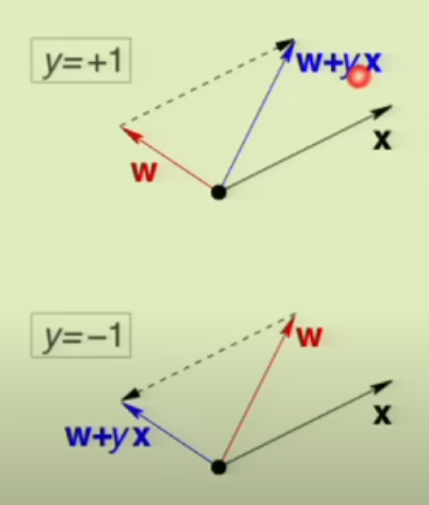

*Image from Lecture 01 from Abu Mostafa, Machine Learning Course*

**Inner product:** $a \cdot b = |a| |b| \cos(\alpha)$
* < 90º : positive
* \> 90º : negative
* == 90º : 0

This is because of cosine function

#### <span style="color: red;">**CONVERGENCE OF PERCEPTRON IS ONLY GUARANTEED IF THE TWO CLASSES ARE LINEARLY SEPARABLE**</span>


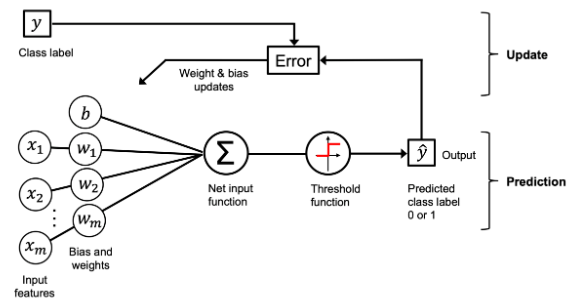

## Implementing a perceptron learning algorithm in Python

In [2]:
import numpy as np

In [13]:
class Perceptron:
    """
    Perceptron Classifier

    Parameters
    -----------
    lr : float
        Learning rate
    n_iter : int
        Maximum number of iterations(epochs) over the training dataset
    random_state : int
        Random number seed

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting
    b_ : Scalar
        Bias after fitting
    errors_ : list
        Number of misclassifications (updates) in each epoch

    """

    def __init__(self, lr: float, n_iter: int, random_state: int):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
        Fit training data

        Parameters
        -----------
        X : {array-like}, shape = [n_examples, n_features])
            Training vectors
        y : array-like, shape = [n_examples]
            Target vector

        Returns
        --------
        self: object


        """

        # Initialize weights
        rgen = np.random.RandomState(seed=self.random_state)
        self.w_ = rgen.normal(
            loc=0.0, scale=0.1, size=X.shape[1]
        )  # Scale(STD) is used small in order to generate small numbers
        self.b_ = np.float_(0.0)
        self.errors_ = []

        for _ in range(self.n_iter_):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(self.w_, X) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

#### **If we initialize the weights to zero as the original perceptron algorithm, the lr would have no effect on the decision boundary. If all weights are initialized to zero, the lr parameter affects only the scale of the weight vector, not the direction.**

This is because the decision function used in perceptron algorithm depends only on the sign of $z$ :
$$
\sigma(z) = 
\begin{cases}
1 & \text{if } z \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

Considering the predicted class label $ŷ^{(1)} = \sigma(w^{(0)}x^{(1)})$ and the weight update $\Delta w^{(1)} = \eta (y^{(1)} - ŷ^{(1)})x^{(1)}$ where $\eta \isin (0,1)$ the new weights are $w^{(1)} = w^{(0)} + \Delta w^{(1)}$

And the predicted class label $ŷ^{(2)} = \sigma(w^{(1)}x^{(2)})$ and the weight update $\Delta w^{(2)} = \eta (y^{(2)} - ŷ^{(2)})x^{(2)}$

Notice that $\Delta w^{(2)}$ implicty depends on $\Delta w^{(1)}$, which in turn implicity depends on $w^{(0)}$. Let us unravel these dependencies by pluggin in:
$$
\begin{align}
\Delta w^{(2)} &= \eta (y^{(2)} - ŷ^{(2)}) x^{(2)}\\
&= \eta (y^{(2)} - \sigma(w^{(1)}x^{(2)})) x^{(2)}\\
&= \eta (y^{(2)} - \sigma(w^{(0)} + \Delta w^{(1)}x^{(2)})) x^{(2)}\\
&= \eta (y^{(2)} - \sigma(w^{(0)} + \eta (y^{(1)} - ŷ^{(1)})x^{(1)}x^{(2)})) x^{(2)}\\
&= \eta (y^{(2)} - \sigma(w^{(0)} + \eta (y^{(1)} - \sigma(w^{(0)}x^{(1)}))x^{(1)}x^{(2)})) x^{(2)}\\

\end{align}
$$

Now suppose we have initialized with zero $w^{(0)} = 0$ 
$$
\begin{align}
\Delta w^{(2)} &= \eta (y^{(2)} - \sigma(0 + \eta (y^{(1)} - \sigma(0 x^{(1)}))x^{(1)}x^{(2)})) x^{(2)} \\
 &= \eta (y^{(2)} - \sigma(\eta (y^{(1)} - 1)x^{(1)}x^{(2)})) x^{(2)} \\

\end{align}
$$

Let us zoom in here and look at $\sigma$ and its argument:

$$
\sigma(\eta (y^{(1)} - 1)x^{(1)}x^{(2)})
$$

Since $\eta > 0$, it does not change the sign of $(y^{(1)} - 1)x^{(1)}x^{(2)}$. But the sign is al that matters to the function $\sigma$. So we can simply remove the learning rate from the function argument without changing the result. The same arguments hold for $\Delta w^{(3)},\Delta w^{(4)},...$

(https://datascience.stackexchange.com/questions/26134/initialize-perceptron-weights-with-zero#:~:text=If%20you%20choose%20zero%20initial,z%E2%89%A50%E2%88%921%20otherwise)



#### **Why do we initialize the weights to very small values?**

*"If the weights are too large, when you compute the activation values, $z = w^T x + b$ will be either very big or very small. And so in that case, you're more likely to end up at these flat parts where the slope or gradient is very small(shown in image) meaning that gradient descent will be very slow and so learning will be very slow."* - **Andrew NG**

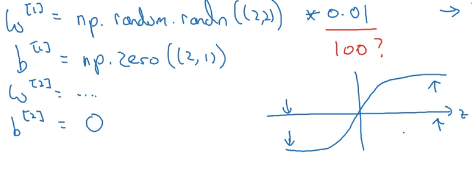

(https://www.coursera.org/lecture/neural-networks-deep-learning/random-initialization-XtFPI)

#### **Using trigonometry to demonstrate why lr only affects the scale of weight vector and not the direction when weights are initialized to 0 (ML with PyTorch and Scikit-Learn Book)**
Consider a vector, v1 = [1 2 3], where the angle between *v1* and a vector, *v2* = 0.5 x *v1*, would be exactly zero, as demonstrated by the following code snippet:

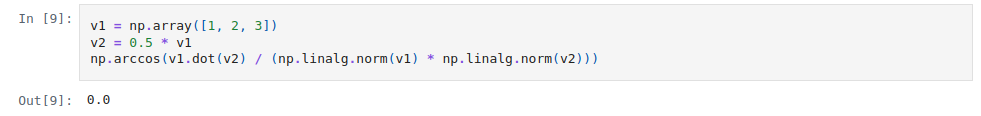

Here, `np.arccos` is the trigonometric inverse cosine, and `np.linalg.norm` is a function that computes the length of a vector